## **EXPLORATORY DATA ANALYSIS**

**IMPORT LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
%matplotlib inline

**IMPORT DATASET**

In [4]:
df = pd.read_csv("C:\\Users\\Neeta Devke\\Desktop\\adult11.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**DROP UNWANTED FROM DATASET**

In [7]:
df.drop(['fnlwgt', 'capital-gain', 'capital-loss'], axis = 1, inplace = True)

In [8]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


**TO CHANGE THE NAME OF COLUMN FROM `income` to `salary`**

In [9]:
df.rename(columns = {'income':'salary'}, inplace = True)

**CHECK THE STATISTICAL INFORMATION OF DATASET**

In [10]:
df.describe(include = 'all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
count,32561.000000,32561,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561,32561
unique,NaN,9,16,NaN,7,15,6,5,2,NaN,42,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,United-States,<=50K
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,29170,24720
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,40.437456,NaN,NaN
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,12.347429,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


**CLEANING THE STRING IN OBJECT COLUMNS**

In [11]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = df[i].map(lambda x:x.strip())

**REMOVE ROWS THAT CONTAINS UNWANTED CHARACTESR FROM  DATASET**

In [12]:
l = []
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j] == '?':
            l.append(j)

df.drop(index = l, inplace = True)
print(len(l))

4262


**CHECK THE MISSSING VALUES OF DATASET**

In [14]:
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [15]:
df.to_csv("data1.csv")

**TO CHANGE THE VALUES OF `salary` COLUMN OF DATASET**

In [16]:
df['salary'] = [ 1 if i == '>50K' else 0 for i in df['salary']]

In [17]:
df.to_csv("data1.csv")

**PEOPLE WHOSE EARNING MORE THAN 50K==1 SALARY**

In [20]:
df[df['salary']==1].shape[0]

7508

**PEOPLE WHOSE EARNING LESS THAN 50K==0 SALARY**

In [21]:
df[df['salary']==0].shape[0]

22654

**UNIQUE VALUES OF COLUMNS**

In [23]:
uniq_values = [print(f"{i}--{df[i].unique()}\n") for i in df.columns]

age--[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]

workclass--['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']

education--['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']

education-num--[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]

marital-status--['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation--['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

relationship--['Not-in-family'

**DOING PRIVATE JOB & SALARY MORE THAN 50K**

In [25]:
df[(df['workclass'] == 'Private') & df['salary']==1]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
10,37,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,1
20,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,United-States,1
52,47,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,60,Honduras,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,50,Japan,1
32536,34,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,55,United-States,1
32538,38,Private,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,1
32554,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1


- So there is `4876` peoples are doing `Private` workclass and `salary` is more than `50K`.

**Checking Male & Female Ratio according to their salary**

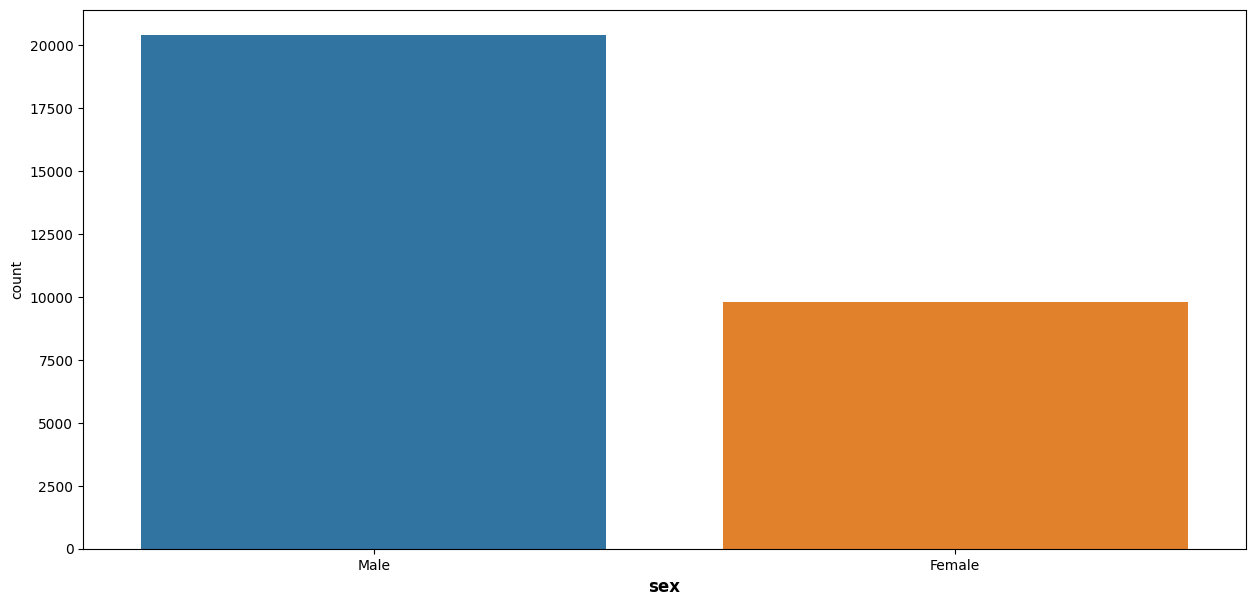

In [26]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x='sex', data = df)
plt.xlabel('sex', fontweight='bold', size=12)
plt.show()

- The count of `Male` doing workclss is greater than `Female`.

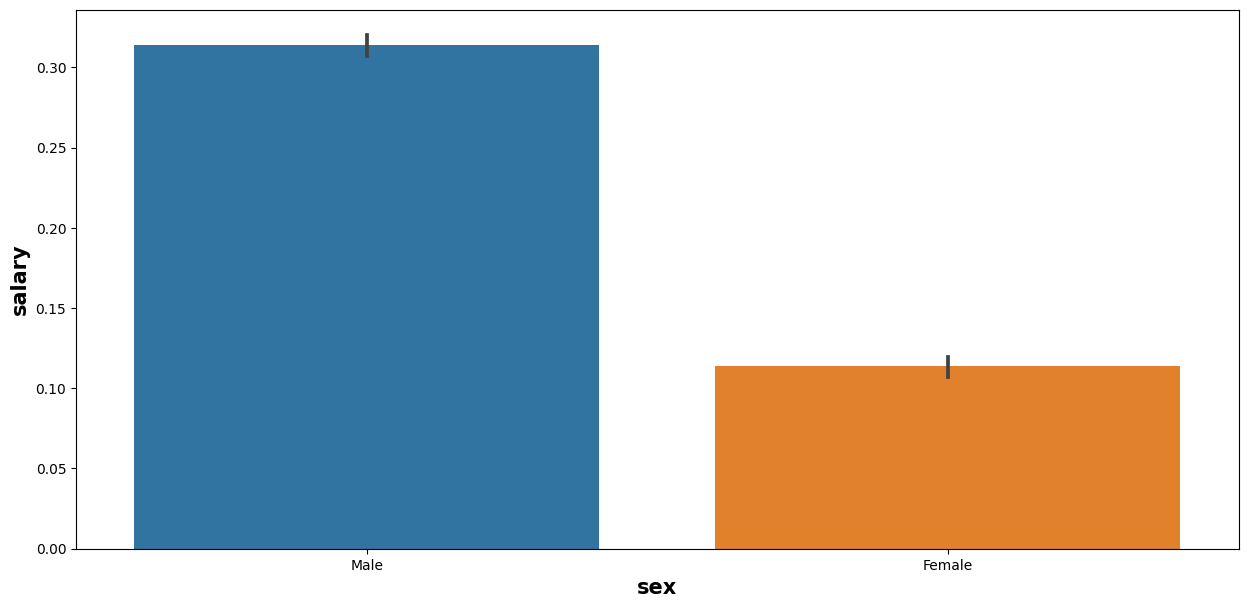

In [27]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'sex', y = 'salary', data = df)
plt.xlabel('sex', fontweight = 'bold', size=15)
plt.ylabel('salary', fontweight = 'bold', size=15)
plt.show()

- The `salary` of `Male` is high as compair to `Female`.

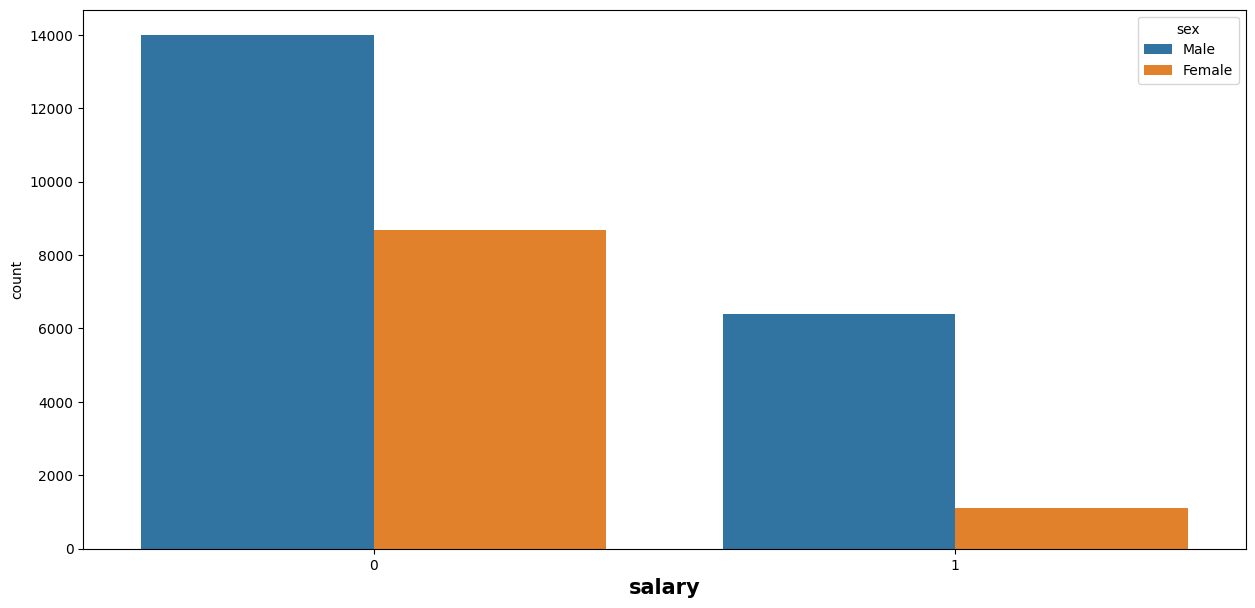

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = 'salary', hue = 'sex')
plt.xlabel('salary', fontweight = 'bold', size=15)
plt.show()

- The ratio of `Male to Salary` whose is `salary` is less than 50K is more as compair to `Female to Salary` ratio and vice a versa.

**WORKCLASS COUNTS**

In [29]:
df['workclass'].value_counts()

workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64

**HOW MANY OF PEOPLES WHOSE AGE ABOVE AVERAGE EARN MORE THAN 50K**

In [31]:
df[(df['age'] > 38) & (df['salary']==1)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
19,43,Self-emp-not-inc,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,45,United-States,1
20,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,United-States,1
25,56,Local-gov,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,50,Japan,1
32545,39,Local-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,1
32554,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1


- So there is `5042` peoples whose `age` is greater than `38` and earning is more than `50K`.

**HOW MANY PEOPLES WHOSE AGE ABOVE AVERAGE EARN LESS THAN 50K**

In [33]:
df[(df['age']>38) & (df['salary']==0)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,0
21,54,Private,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,20,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32548,65,Self-emp-not-inc,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,60,United-States,0
32549,43,State-gov,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,40,United-States,0
32550,43,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,0
32552,43,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,45,United-States,0


- There is `8911` peoples whose age is greater than average `age` earning less than `50K`.

**UNIVARIATE ANALYSIS OF `worclass`**

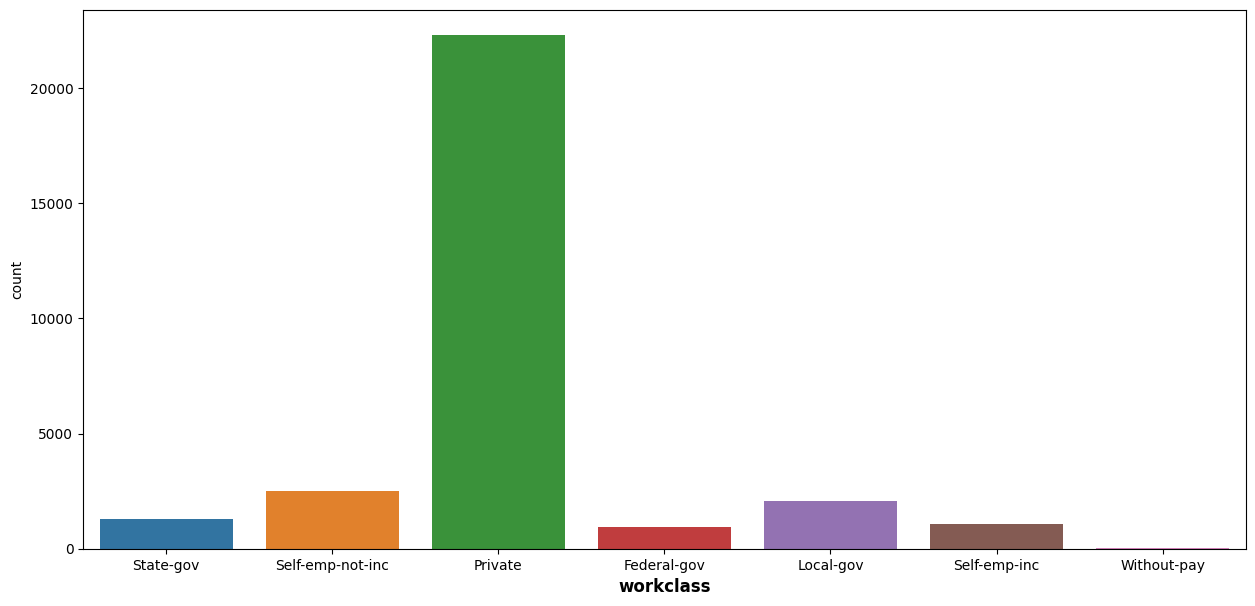

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x='workclass', data = df)
plt.xlabel('workclass', fontweight='bold', size=12)
plt.show()

- There is highest count of `Private` workclass peoples doing.

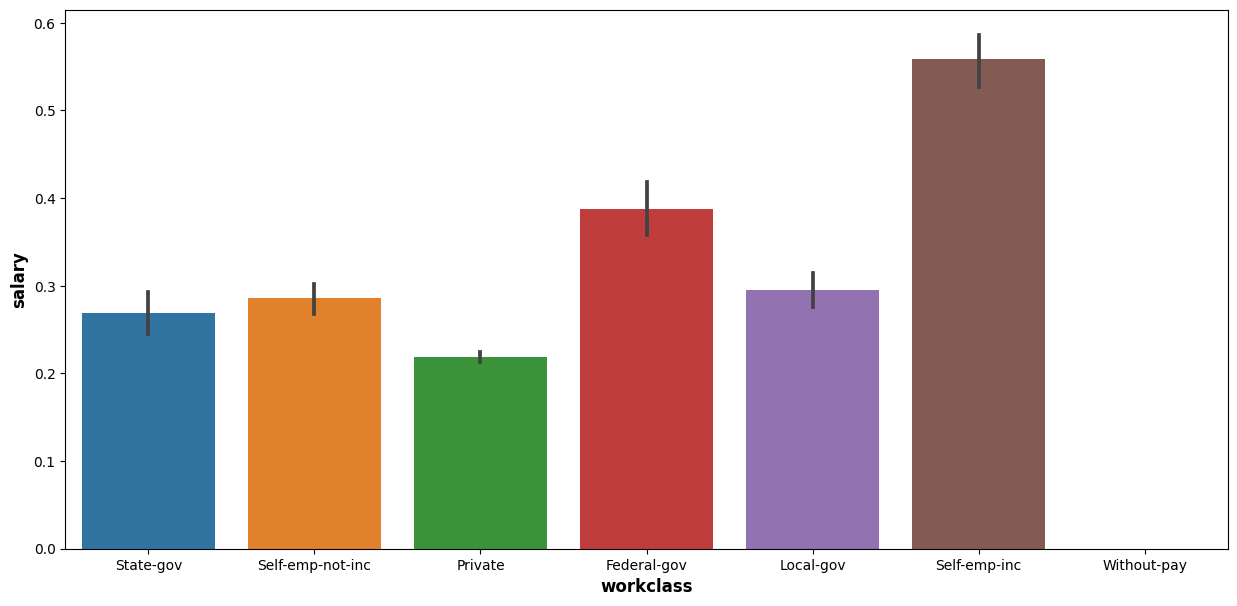

In [36]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'workclass', y = 'salary', data = df)
plt.xlabel('workclass', fontweight = 'bold', size=12)
plt.ylabel('salary', fontweight = 'bold', size=12)
plt.show()

- From the above the salary of `self-emp-inc` workclass is high.

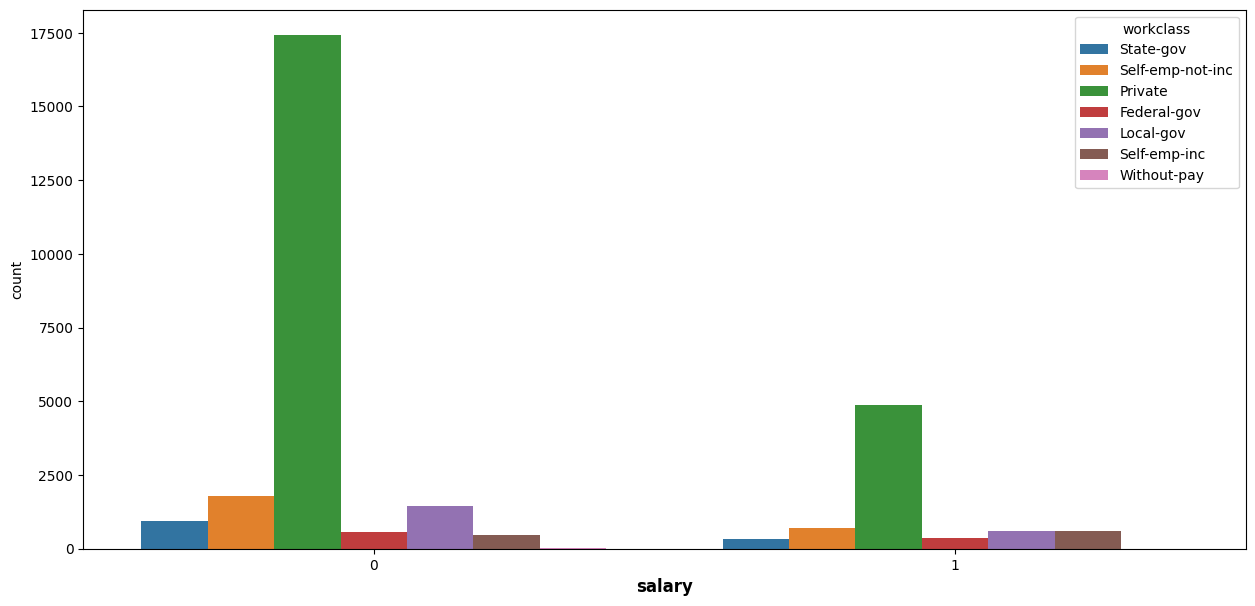

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = 'salary', hue = 'workclass')
plt.xlabel('salary', fontweight = 'bold', size=12)
plt.show()

- In both the cases, salary of  `Private` workclass have highest count.

**CHECKING DISTRIBUTION OF PEOPLES IN EDUCATION ACCORDING TO SALARY**

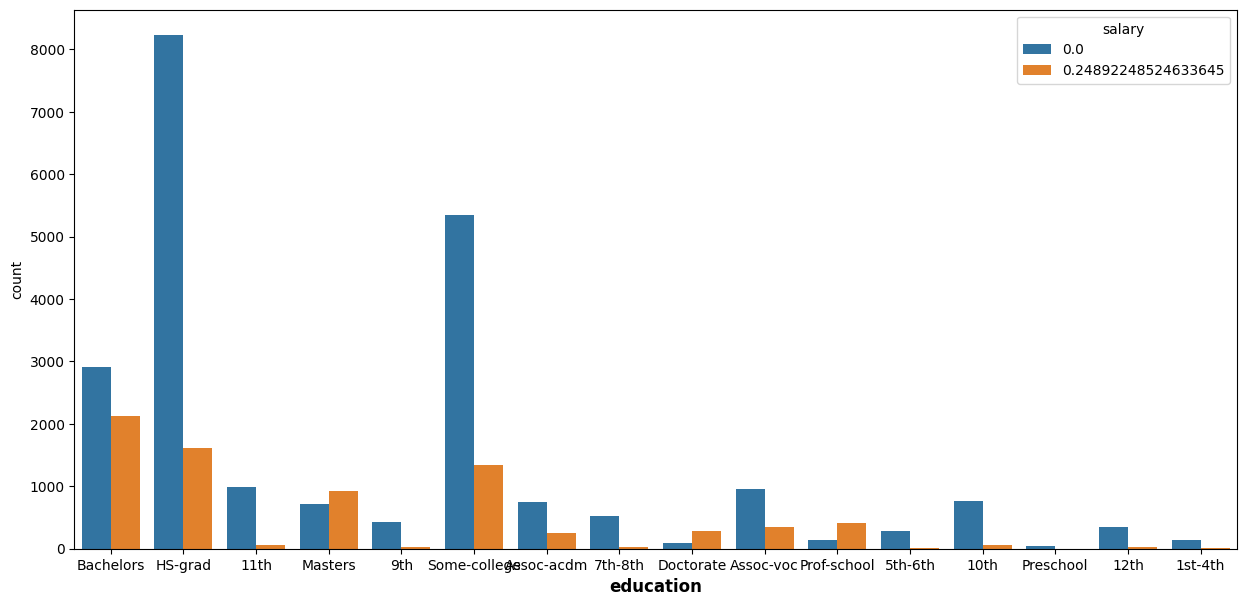

In [62]:
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = 'education', hue = 'salary')
plt.xlabel('education', fontweight = 'bold', size=12)
plt.show()

- The count of peoples is highest whose eduction is `HS-grad` and salary is less than `50K`.

**NUMERICAL COLUMNS**

In [40]:
num_columns = df.columns[df.dtypes != 'object']

In [41]:
num_columns

Index(['age', 'education-num', 'hours-per-week', 'salary'], dtype='object')

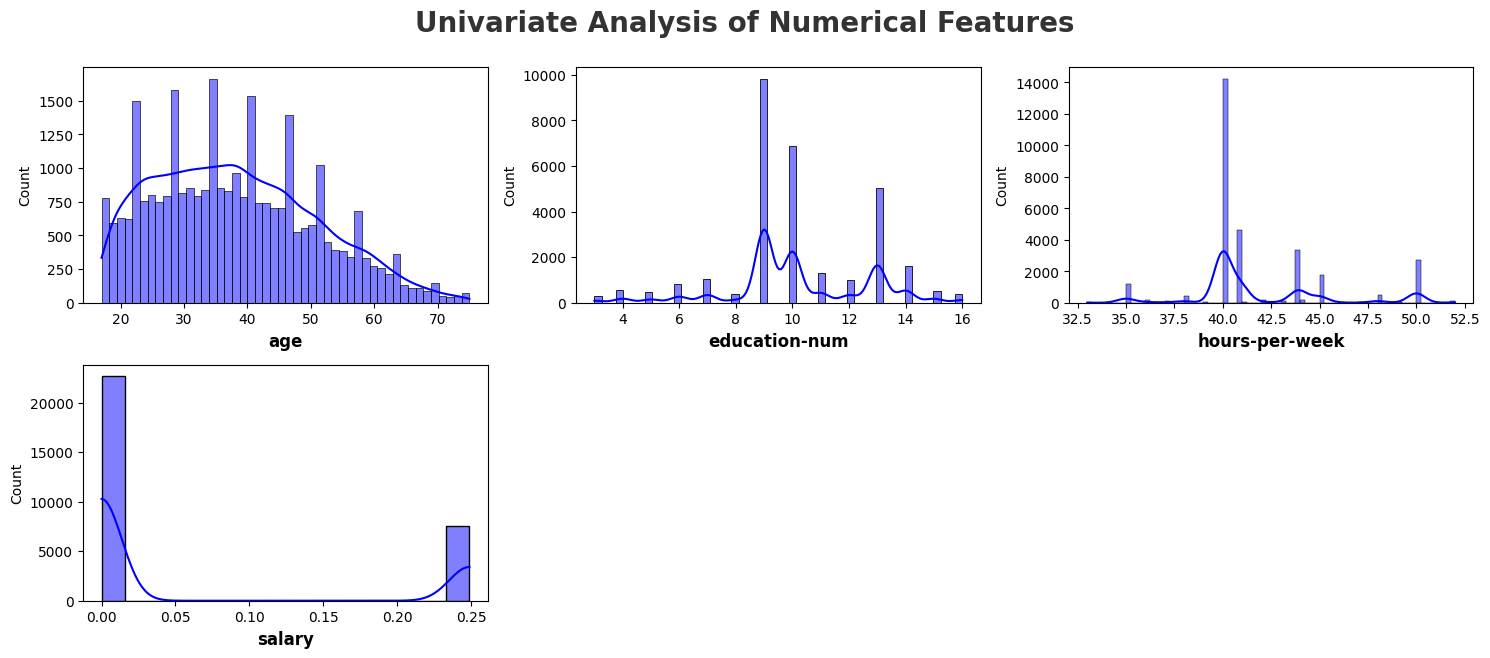

In [61]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight = 'bold', alpha = 0.8, y=1.)

for i in range(0, len(num_columns)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df[num_columns[i]], kde = True, color = 'b')
    plt.xlabel(num_columns[i], fontweight='bold', size=12)
    plt.tight_layout()

C:\Users\Neeta Devke\AppData\Local\Temp\ipykernel_16768\2321948053.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[num_columns[i]], shade = True, color='b')


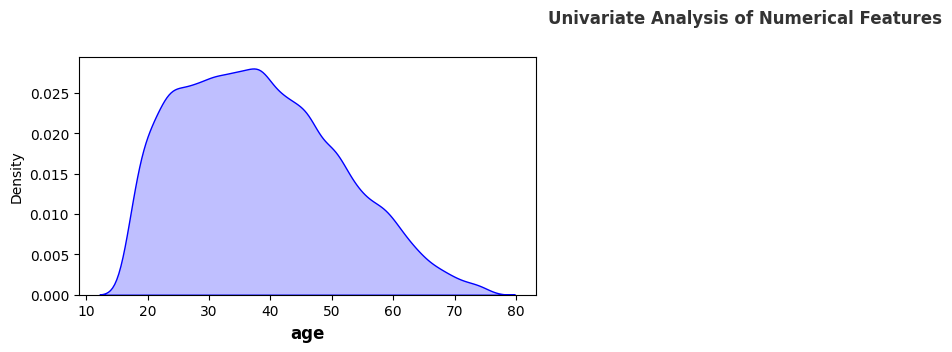

C:\Users\Neeta Devke\AppData\Local\Temp\ipykernel_16768\2321948053.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[num_columns[i]], shade = True, color='b')


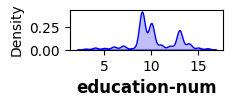

C:\Users\Neeta Devke\AppData\Local\Temp\ipykernel_16768\2321948053.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[num_columns[i]], shade = True, color='b')


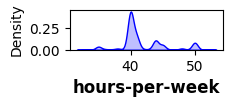

C:\Users\Neeta Devke\AppData\Local\Temp\ipykernel_16768\2321948053.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[num_columns[i]], shade = True, color='b')


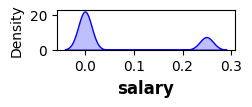

In [60]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features", fontweight = 'bold', alpha = 0.8, y =1.)

for i in range(0, len(num_columns)):
    plt.subplot(5,3, i+1)
    sns.kdeplot(x=df[num_columns[i]], shade = True, color='b')
    plt.xlabel(num_columns[i], fontweight='bold', size=12)
    plt.tight_layout()
    plt.show()

**CATEGORICAL COLUMNS**

In [46]:
cat_columns = df.columns[df.dtypes == 'object']

In [47]:
cat_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

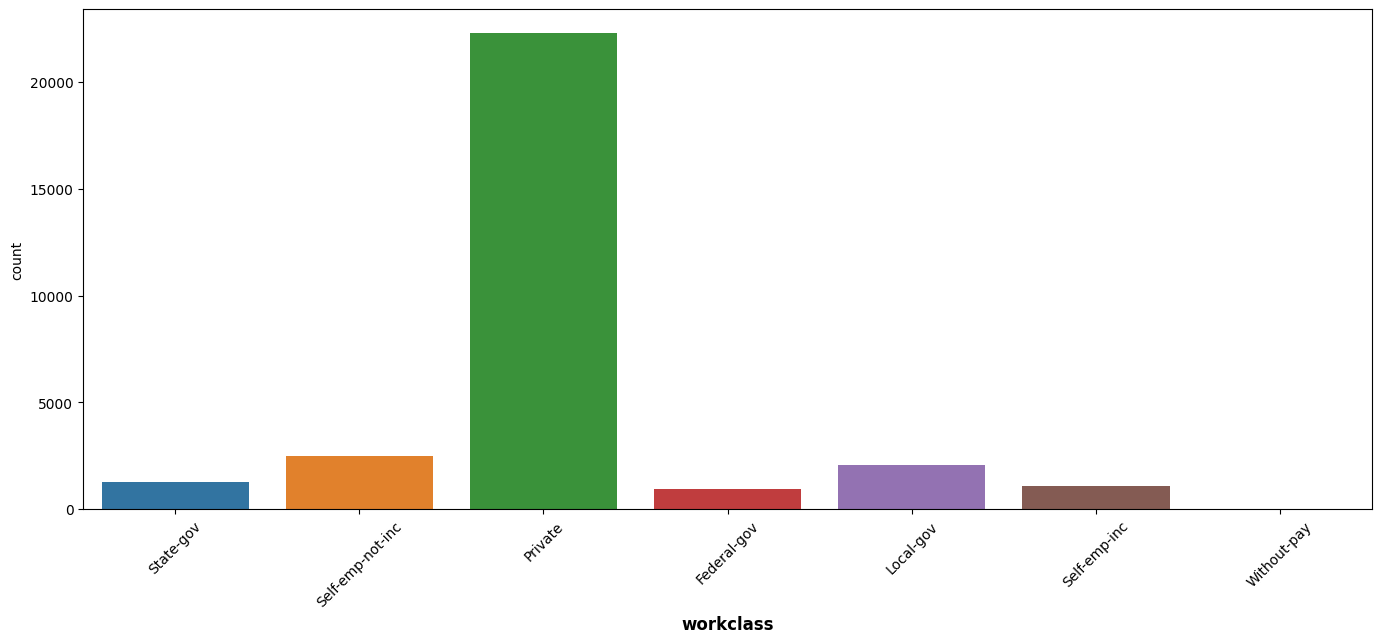

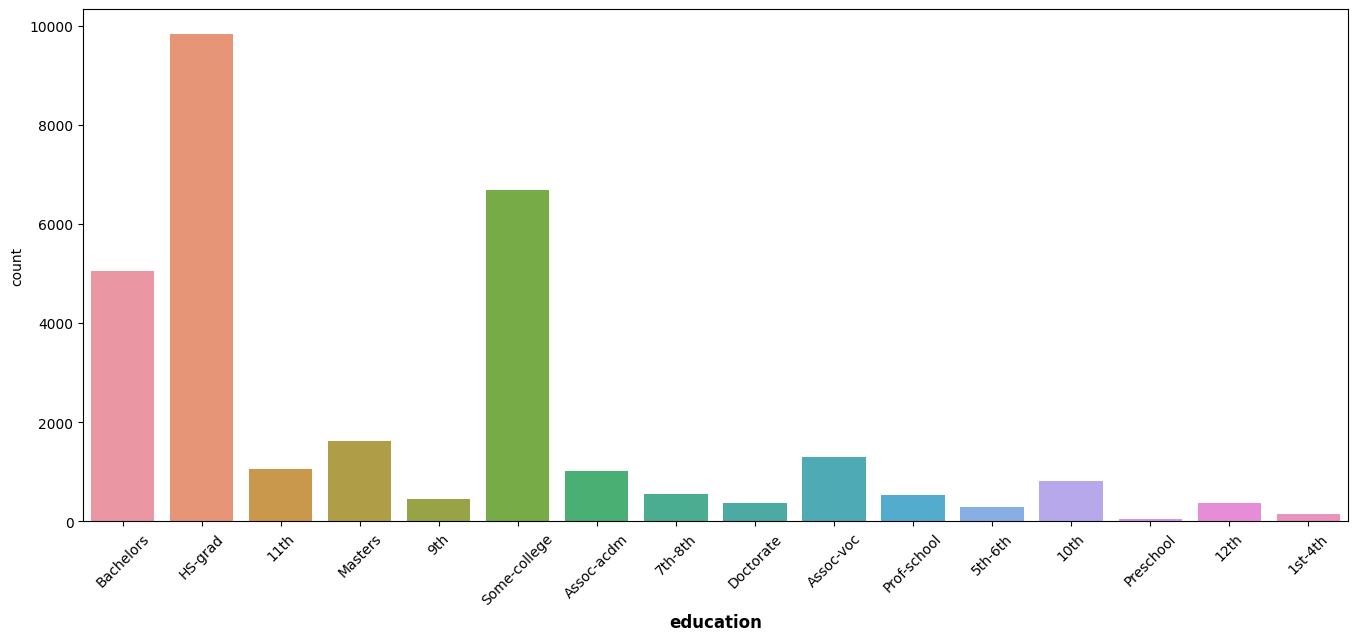

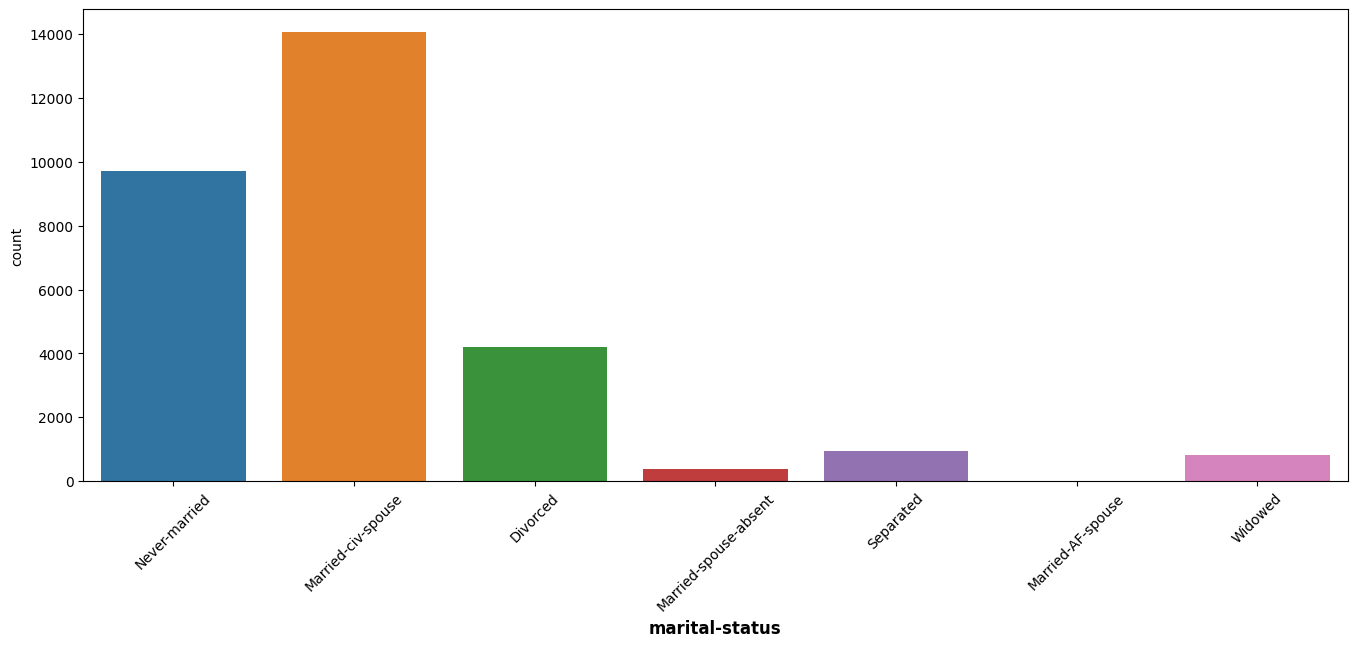

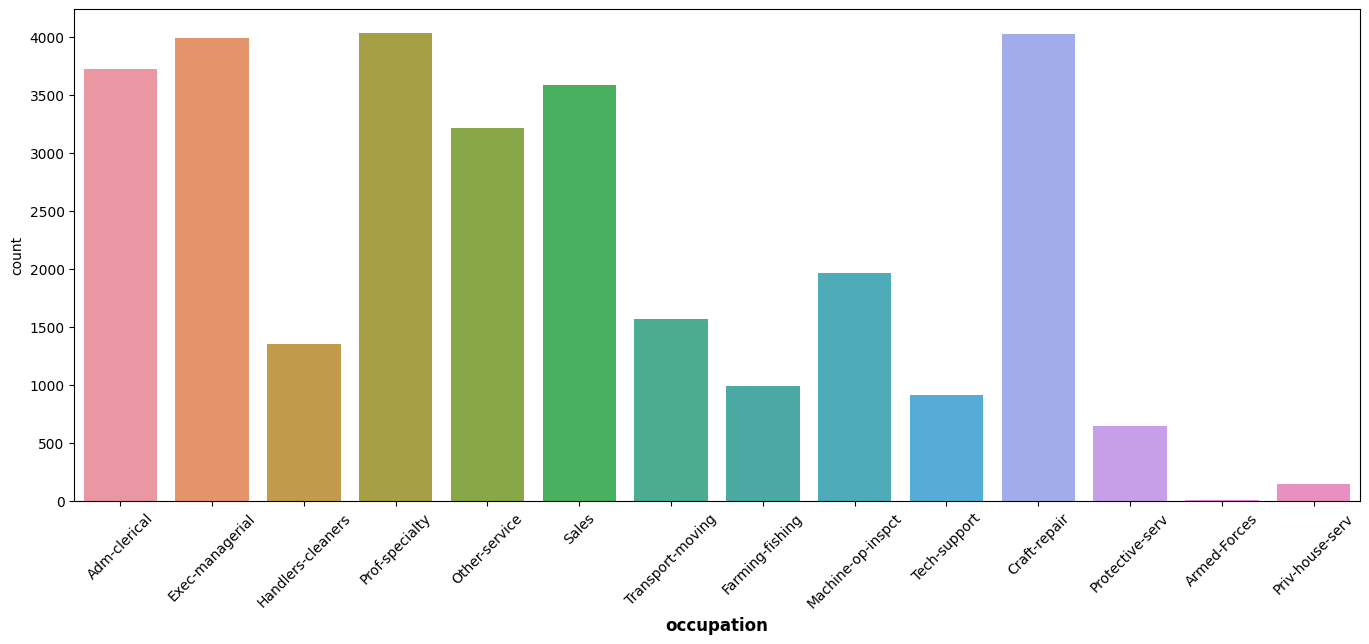

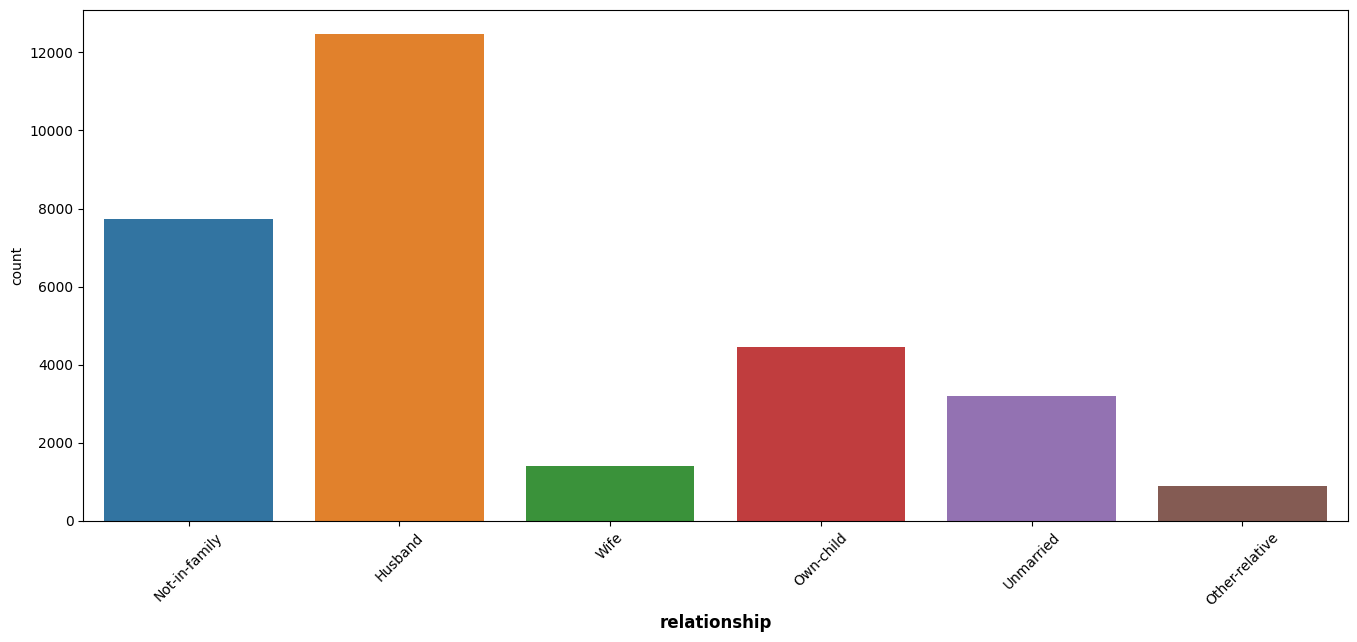

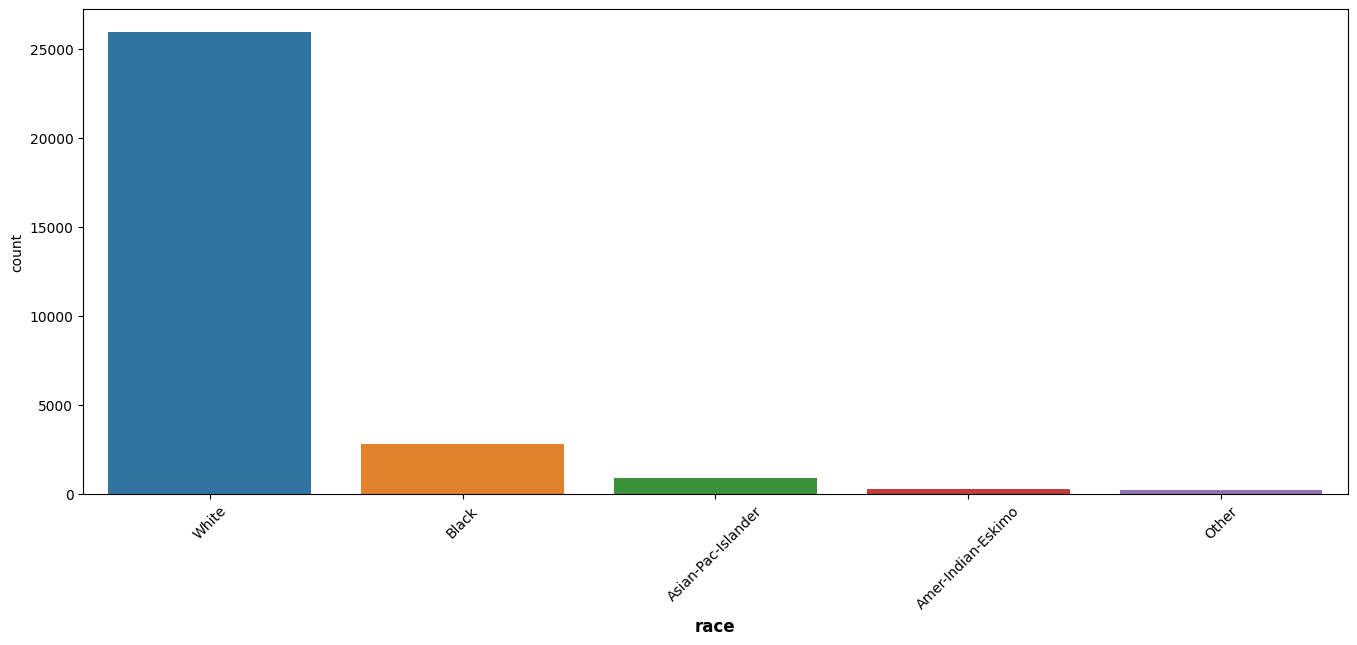

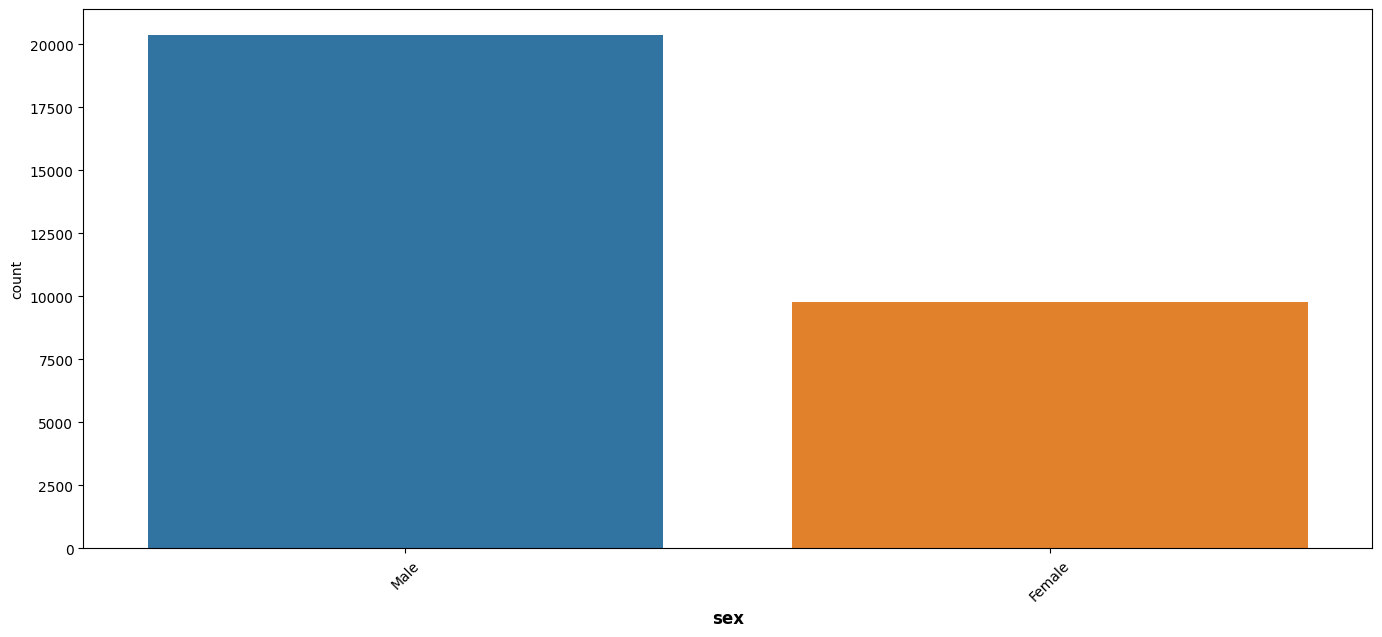

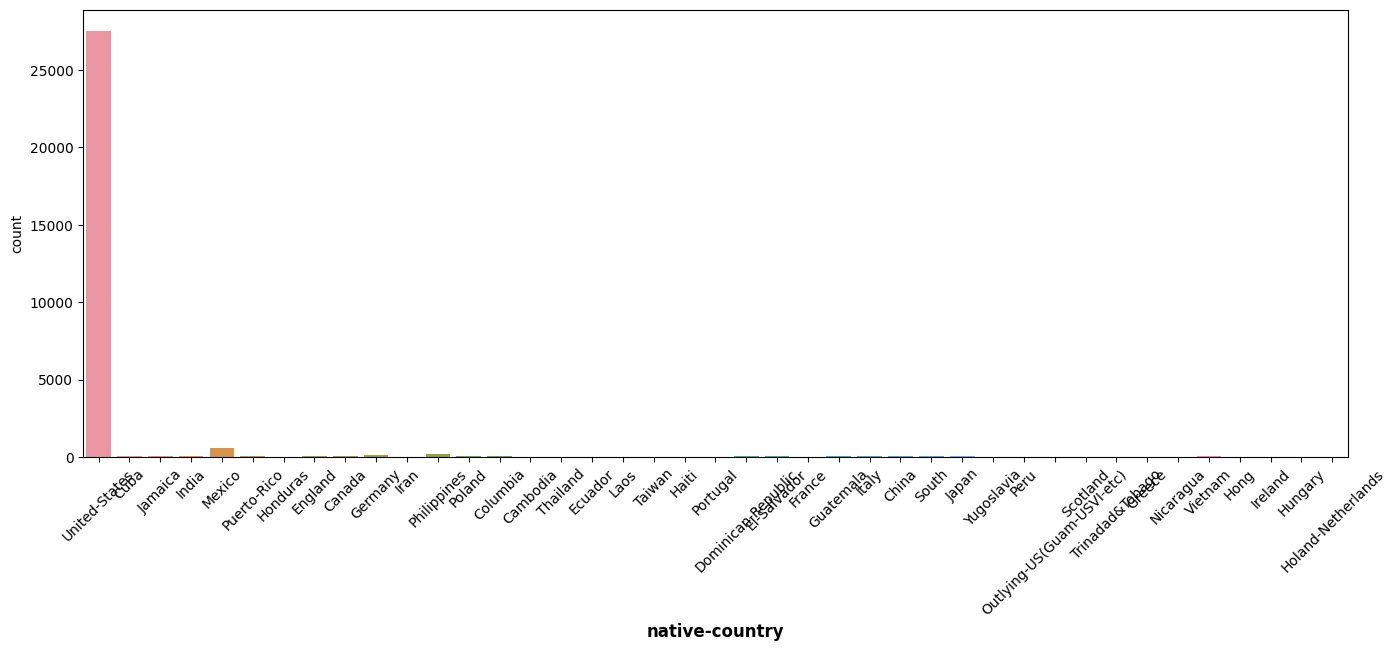

In [59]:
plt.suptitle("Univariate Analysis of Categorical Features", fontweight='bold', fontsize = 20, alpha = 0.8, y=1.)
for i in range(0, len(cat_columns)):
    plt.figure(figsize=(40,50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_columns[i]])
    plt.xlabel(cat_columns[i], fontweight='bold', size=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Check Multicollinearity in Numerical Features**

In [49]:
df[(list(df[num_columns])[1:])].corr()

,education-num,hours-per-week,salary
education-num,1.000000,0.152522,0.335286
hours-per-week,0.152522,1.000000,0.229480
salary,0.335286,0.229480,1.000000


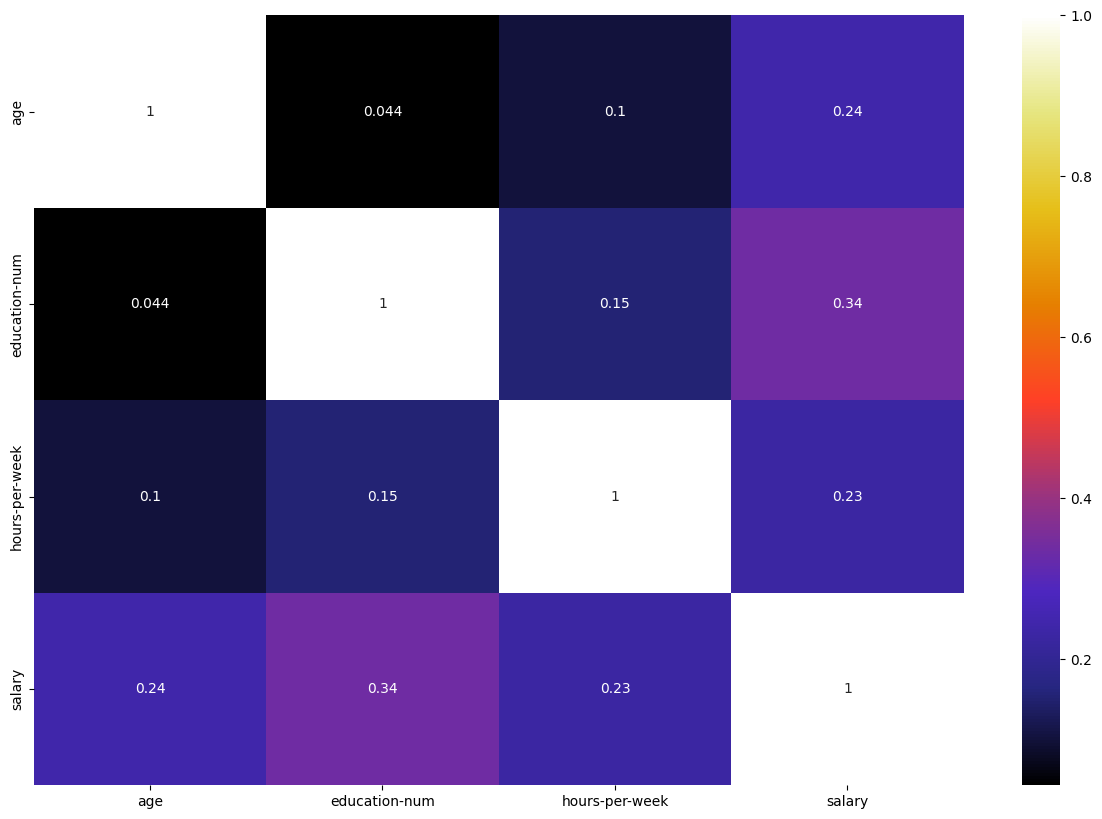

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_columns].corr(), cmap = "CMRmap", annot = True)
plt.show()

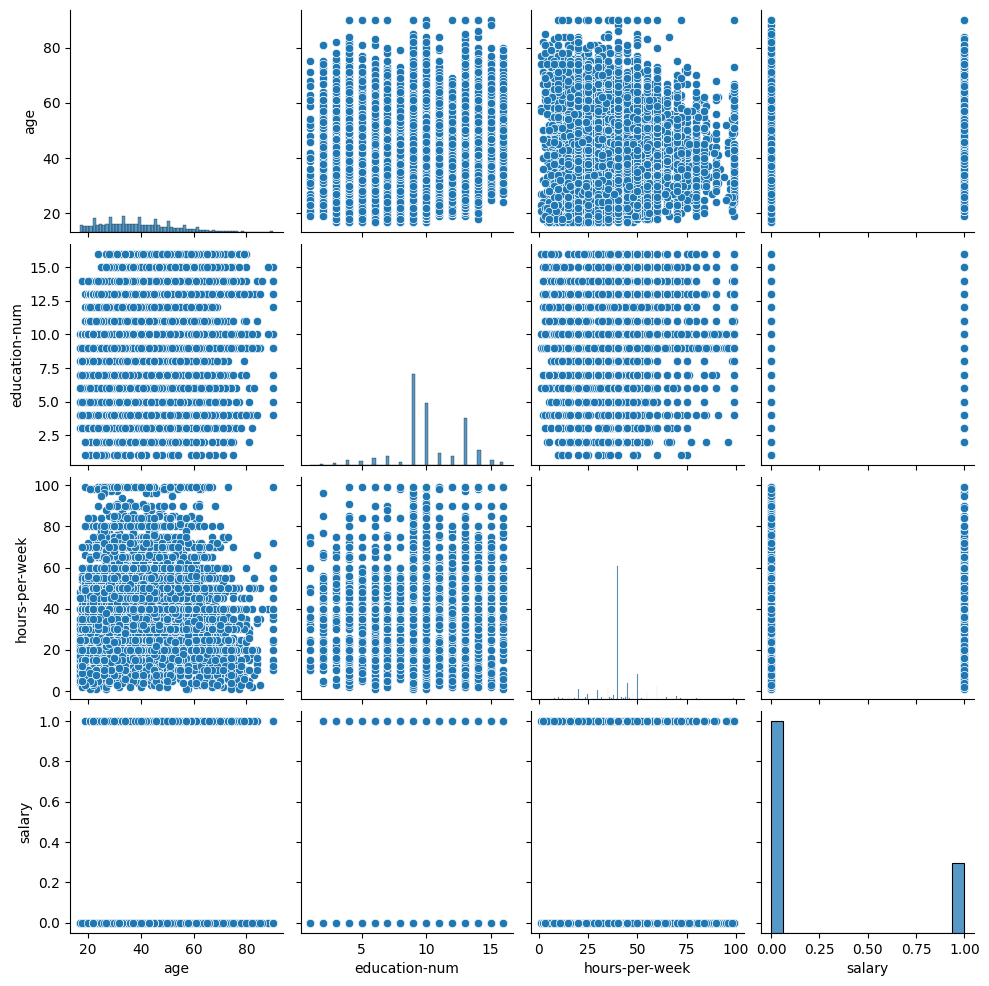

In [51]:
sns.pairplot(df)

#### **Checking Outliers**

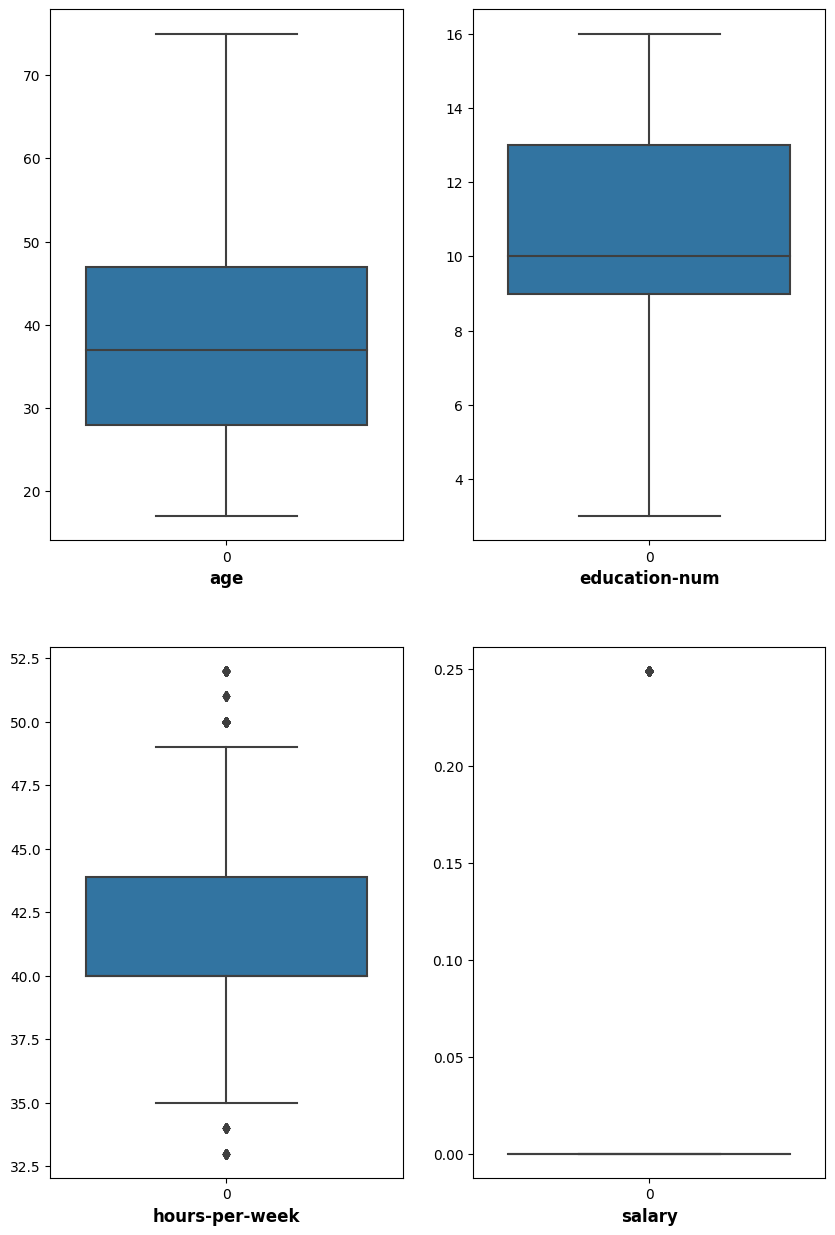

In [63]:
plt.figure(figsize=(10,40))
for i in range(0, len(num_columns)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(df[num_columns[i]])
    plt.xlabel(num_columns[i], fontweight='bold', size=12)

**Treating Outliers**

**Function to Detect Outliers**

In [53]:
def outlier_threshold(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(.75)
    iqr = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr
    return low_limit, up_limit

In [54]:
outlier_threshold(df, num_columns)

(age               -0.5
 education-num      3.0
 hours-per-week    32.5
 salary             0.0
 dtype: float64,
 age               75.5
 education-num     19.0
 hours-per-week    52.5
 salary             0.0
 dtype: float64)

**Function To Remove Outliers**

In [55]:
def replace_with_threshold(dataframe, num_columns):
    for variable in num_columns:
        low_limit, up_limit = outlier_threshold(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].mean()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].mean()

In [56]:
replace_with_threshold(df, num_columns)

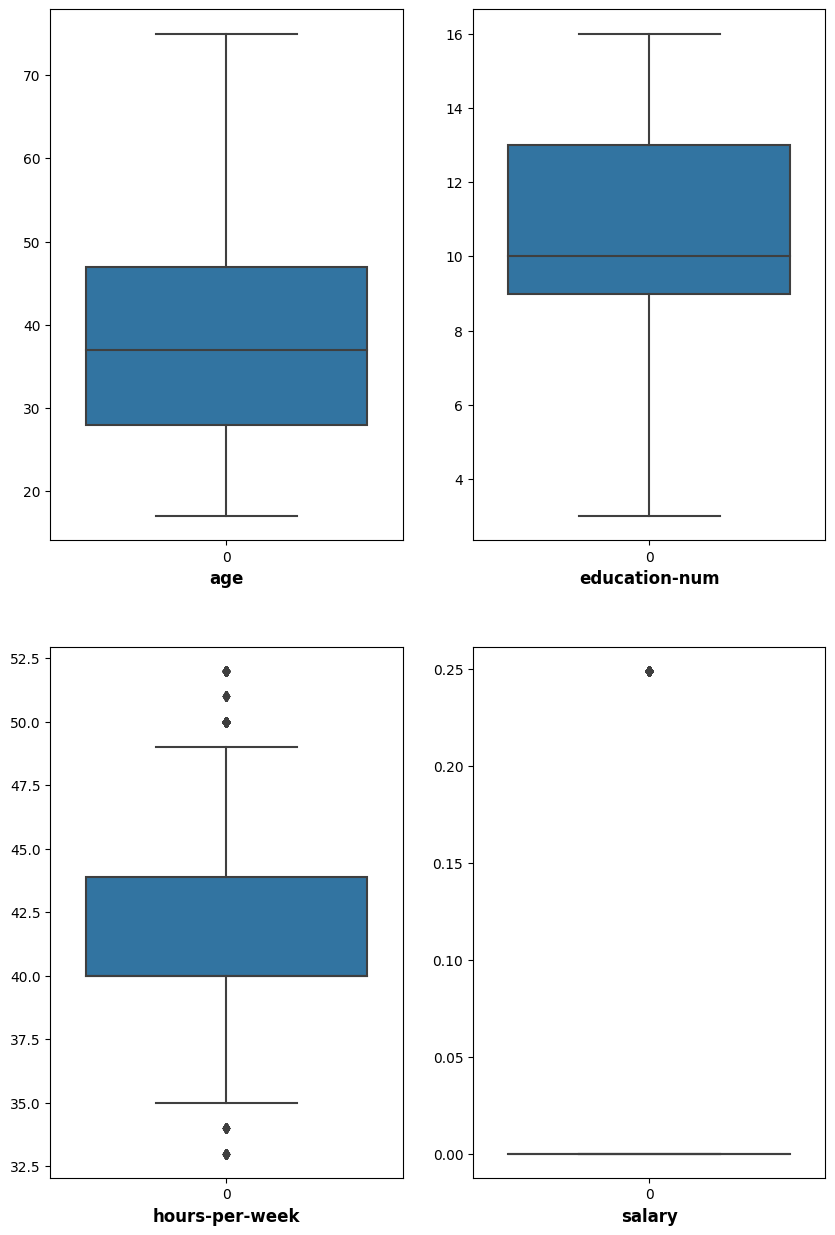

In [64]:
plt.figure(figsize=(10,40))
for i in range(0, len(num_columns)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(df[num_columns[i]])
    plt.xlabel(num_columns[i], fontweight='bold', size=12)
plt.show()